<a href="https://colab.research.google.com/github/Git-Hub-Pro/ML-using-keras/blob/master/iris_Data_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# google colab에 gdrive mount 하기(아래 링크 클릭후, 내용 복사 후 입력하기)
# 12시간 지나면 자동으로 해제되어서 지속적으로 로그인을 해주어야 한다.
from google.colab import drive
drive.mount('/content/gdrive/')

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dense, Input
from keras.models import Model, Sequential
from keras.utils import to_categorical
from collections import Counter
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [3]:
'''
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica
'''

'\n1. sepal length in cm \n2. sepal width in cm \n3. petal length in cm \n4. petal width in cm \n5. class: \n-- Iris Setosa \n-- Iris Versicolour \n-- Iris Virginica\n'

In [6]:
df = pd.read_csv("/content/gdrive/My Drive/data/iris.data", index_col=False, names=['s_len', 's_wid', 'p_len', 'p_wid', 'class'])

,s_len,s_wid,p_len,p_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.count()

s_len    150
s_wid    150
p_len    150
p_wid    150
class    150
dtype: int64

In [8]:
df.head(150)

,s_len,s_wid,p_len,p_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
df.describe()

,s_len,s_wid,p_len,p_wid
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [0]:
Y = LabelEncoder().fit_transform(df['class'])
Y = to_categorical(Y)

X = df.drop('class',axis=1)
X_train  = X[:-5]
X_test = X[-5:]

Y_train = Y[:-5]
Y_test = Y[-5:]

In [40]:
model = Sequential()
model.add(Dense(256,input_shape=(4,),activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
hist = model.fit(X_train, Y_train, epochs=40, validation_split=0.1)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 256)               1280      
_________________________________________________________________
dense_42 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_43 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_44 (Dense)             (None, 3)                 99        
Total params: 38,403
Trainable params: 38,403
Non-trainable params: 0
_________________________________________________________________
Train on 130 samples, validate on 15 samples
Epoch 1/40
130/130 [==============================] - 0s 4ms/step - loss: 0.9625 - acc: 0.5538 - val_loss: 1.5479 - val_acc: 0.0000e+00
Epoch 2/40
130/130 [==============================] - 0s 170us/ste

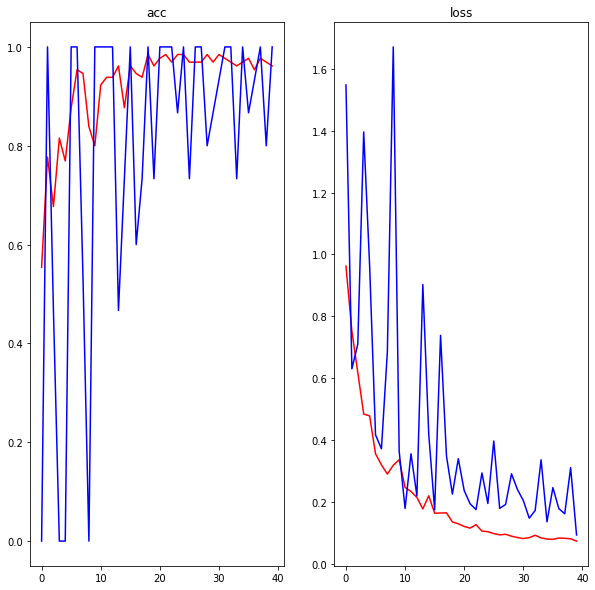

In [41]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.plot(hist.history['acc'], color='r')
plt.plot(hist.history['val_acc'], color='b')
plt.title('acc')
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], color='r')
plt.plot(hist.history['val_loss'], color='b')
plt.title('loss')
plt.show()

In [42]:
score = model.evaluate(X_test,Y_test)
print(score)

5/5 [==============================] - 0s 790us/step
[0.040028832852840424, 1.0]
